## Proyecto: Aumento Automatico de Datos

### Pruebas independientes de aumento de imagenes

In [78]:
# Librerías necesarias
from autoaugment import ImageNetPolicy, SubPolicy  # Políticas de aumento automático de imágenes 
import PIL  # Biblioteca para procesamiento de imágenes
import os  # Para manejo de rutas de archivos
from PIL import Image, ImageEnhance, ImageOps  # Operaciones específicas de imágenes
import numpy as np  # Operaciones matemáticas y manipulación de datos
import matplotlib.pyplot as plt  # Visualización de imágenes
import math  # Operaciones matemáticas adicionales
import random  # Para operaciones aleatorias
import pdb  # Depuración

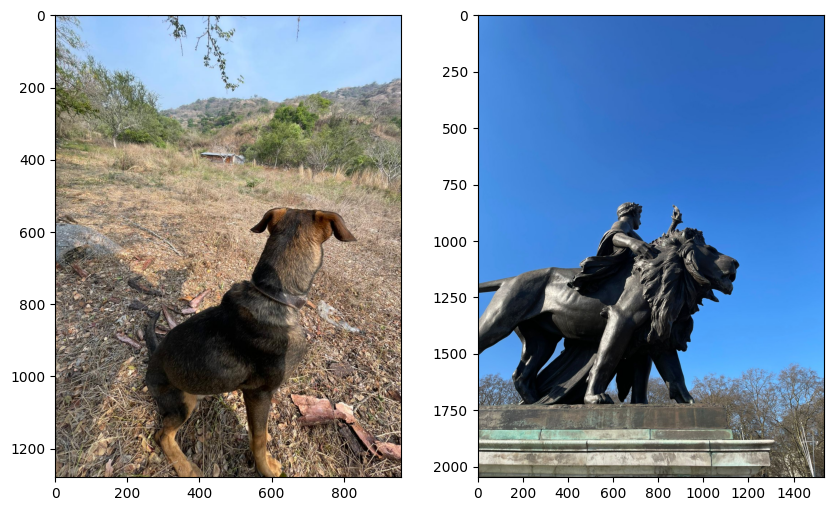

In [79]:
# Cargamos las dos imagenes de ejemplo para visualizar tecnicas de aumento de datos
img1 = Image.open("images/oso01.jpeg")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.imshow(img1)
img2 = Image.open("images/lion01.jpeg")
ax2.imshow(img2)
plt.show()
img = img2.resize((500, 500))


#### Ejemplo de politicas independientes de aumento de datos

In [80]:
ranges = {
            "shearX": np.linspace(0, 0.3, 10),
            "shearY": np.linspace(0, 0.3, 10),
            "translateX": np.linspace(0, 150 / 331, 10),
            "translateY": np.linspace(0, 150 / 331, 10),
            "rotate": np.linspace(0, 30, 10),
            "color": np.linspace(0.0, 0.9, 10),
            "posterize": np.round(np.linspace(8, 4, 10), 0).astype(int),
            "solarize": np.linspace(256, 0, 10),
            "contrast": np.linspace(0.0, 0.9, 10),
            "sharpness": np.linspace(0.0, 0.9, 10),
            "brightness": np.linspace(0.0, 0.9, 10),
            "autocontrast": [0] * 10,
            "equalize": [0] * 10,
            "invert": [0] * 10
        }

In [ ]:
def muestra2(enhanced_img, titles=0):
    """
    Muestra dos imágenes lado a lado: la original y la mejorada.

    Args:
        enhanced_img (PIL.Image.Image): Imagen mejorada que se mostrará.
        titles (list or tuple, optional): Títulos de las imágenes [original, mejorada].
                                          Por defecto, 0 (sin títulos).

    Returns:
        None: Muestra las imágenes en la figura.
    """
    f, axarr = plt.subplots(1, 2, figsize=(10, 6))
    axarr[0].imshow(img)
    axarr[0].axis("off")
    axarr[0].set_title(titles[0])
    axarr[1].imshow(enhanced_img)
    axarr[1].axis("off")
    axarr[1].set_title(titles[1])
    plt.show()

def muestra3(images, titles=0):
    """
    Muestra la imagen original junto con tres versiones mejoradas.

    Args:
        images (list): Lista con las tres imágenes mejoradas.
        titles (list or tuple, optional): Títulos de las imágenes [original, magnitud1, magnitud2, magnitud3].
                                          Por defecto, 0 (sin títulos).

    Returns:
        None: Muestra las imágenes en la figura.
    """
    f, axarr = plt.subplots(1, 4, figsize=(20, 10))
    for idx, ax in enumerate(axarr):
        if idx==0: ax.imshow(img)
        else: ax.imshow(images[idx-1])
        ax.axis("off")
        if titles: ax.set_title(titles[idx])
    plt.show()

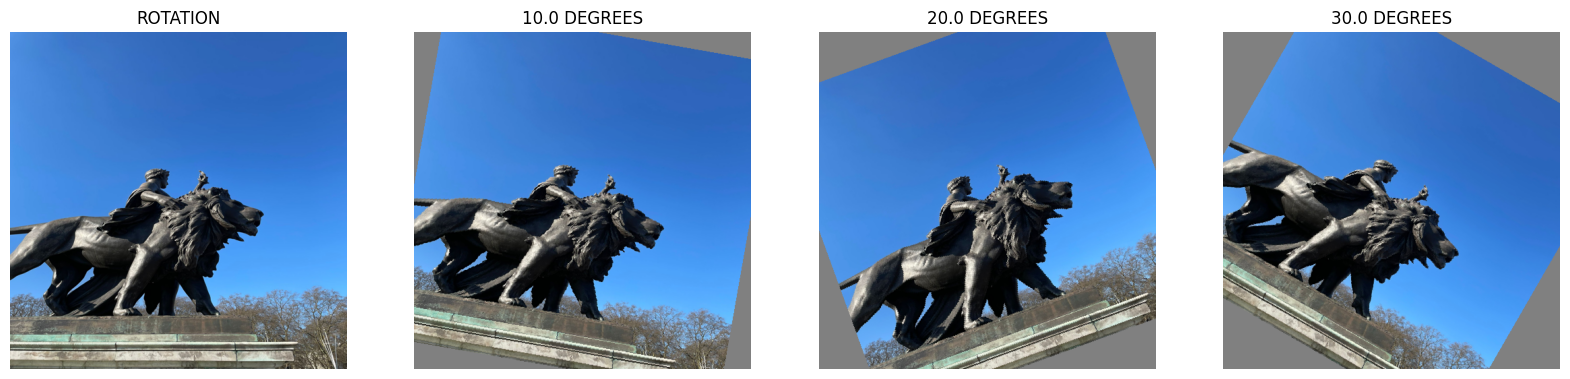

In [82]:
def rotar_imagen(img, magnitude):
    """
    Rota una imagen y rellena las áreas vacías con un color gris transparente.

    Args:
        img (PIL.Image.Image): Imagen a rotar.
        magnitude (int or float): Ángulo de rotación en grados. 
                                  Positivo = antihorario, Negativo = horario.

    Returns:
        PIL.Image.Image: Imagen rotada con relleno aplicado.
    """
    im2 = img.convert("RGBA")
    rot = im2.rotate(magnitude)
    fff = Image.new("RGBA", rot.size, (128,) * 4)
    out = Image.composite(rot, fff, rot)
    return out.convert(img.mode)

enhance_key = "rotate"
muestra3(
    images=[rotar_imagen(img, ranges[enhance_key][3] * random.choice([-1, 1])), 
            rotar_imagen(img, ranges[enhance_key][6] * random.choice([-1, 1])), 
            rotar_imagen(img, ranges[enhance_key][9] * random.choice([-1, 1]))], 
    titles=["ROTATION", "{:.1f} DEGREES".format(ranges[enhance_key][3]), 
            "{:.1f} DEGREES".format(ranges[enhance_key][6]), 
            "{:.1f} DEGREES".format(ranges[enhance_key][9])])

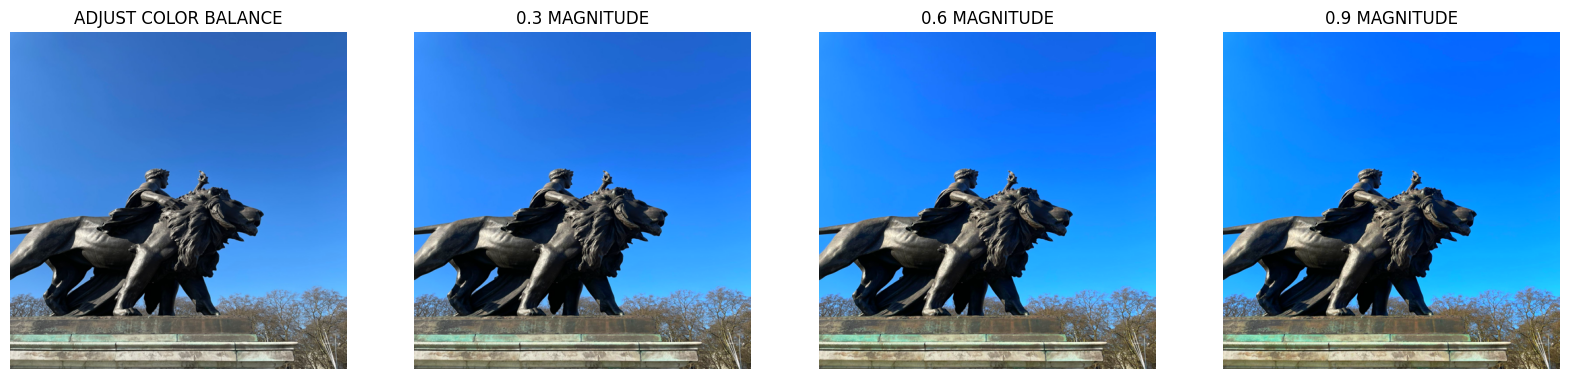

In [83]:
# Modificar colores
enhance_key = "color"
enhancer = ImageEnhance.Color(img)
muestra3(
    images=[enhancer.enhance(1 + ranges[enhance_key][3] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][6] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][9] * random.choice([-1, 1]))],
    titles=["ADJUST COLOR BALANCE", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

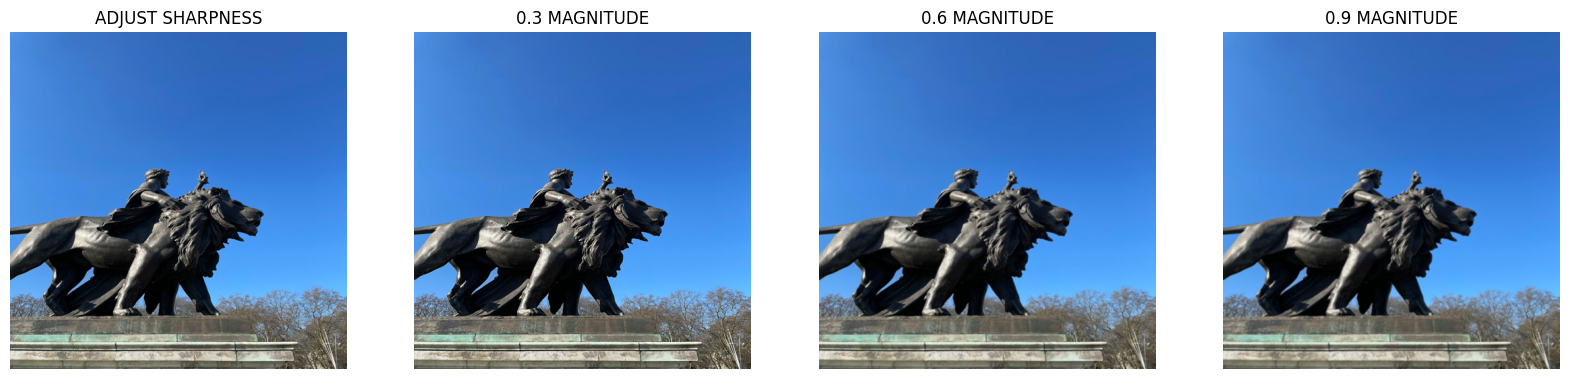

In [84]:
# Modificar nitidez
enhance_key = "sharpness"
enhancer = ImageEnhance.Sharpness(img)
muestra3(
    images=[enhancer.enhance(1 + ranges[enhance_key][3] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][6] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][9] * random.choice([-1, 1]))],
    titles=["ADJUST SHARPNESS", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

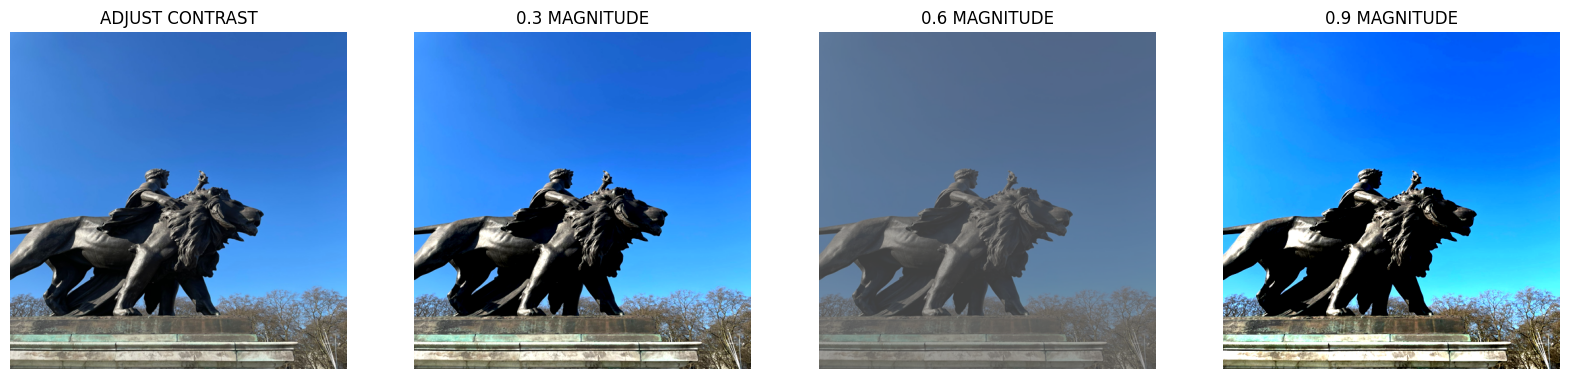

In [85]:
# Modificar contraste
enhance_key = "contrast"
enhancer = ImageEnhance.Contrast(img)
muestra3(
    images=[enhancer.enhance(1 + ranges[enhance_key][3] * random.choice([-1, 1])),
            enhancer.enhance(1 + ranges[enhance_key][6] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][9] * random.choice([-1, 1]))],
    titles=["ADJUST CONTRAST", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

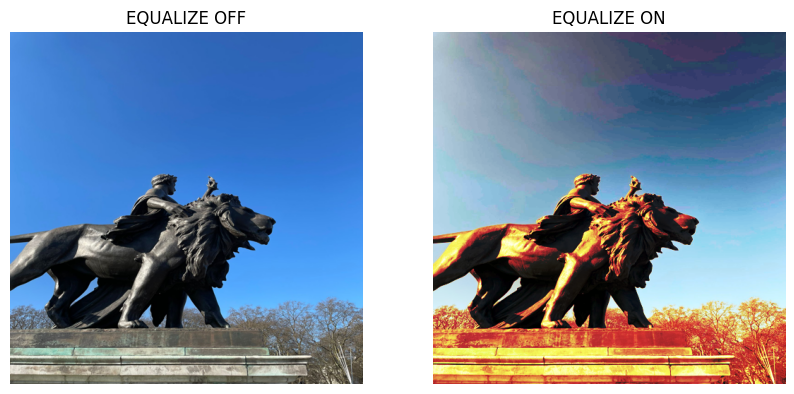

In [86]:
# Igualar el histograma de color
img_enhanced = ImageOps.equalize(img) 
muestra2(img_enhanced, titles=["EQUALIZE OFF", "EQUALIZE ON"])

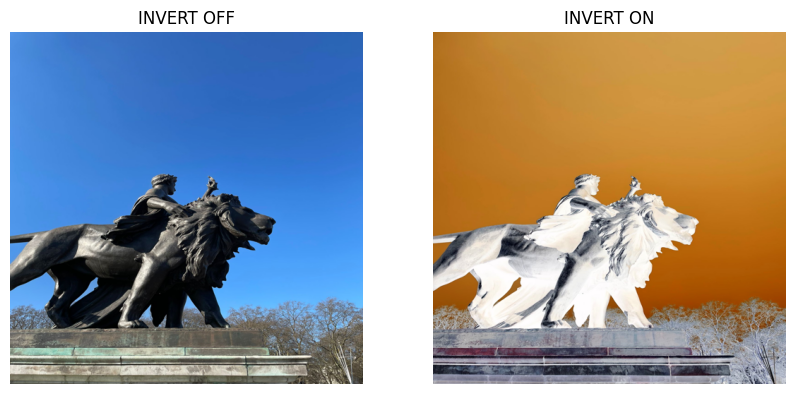

In [87]:
# Invertir valores del pixel

img_enhanced = ImageOps.invert(img) 
muestra2(img_enhanced, titles=["INVERT OFF", "INVERT ON"])

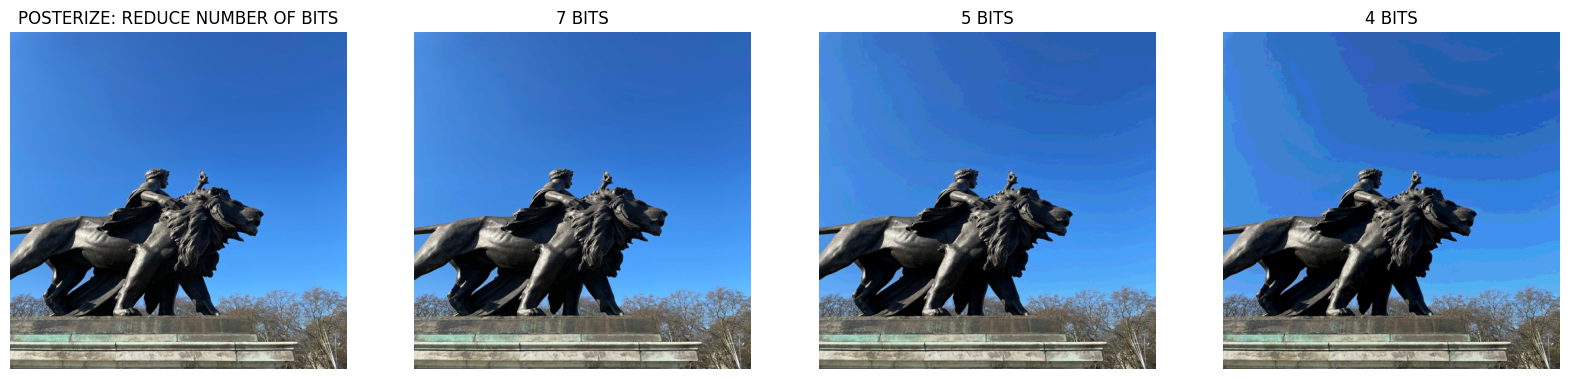

In [88]:
# Reducir el numero de bits por canal
enhance_key = "posterize"
muestra3(
    images=[ImageOps.posterize(img, ranges[enhance_key][3]) ,
            ImageOps.posterize(img, ranges[enhance_key][6]) ,
            ImageOps.posterize(img, ranges[enhance_key][9])],
    titles=["POSTERIZE: REDUCE NUMBER OF BITS", "{:.0f} BITS".format(ranges[enhance_key][3]),
            "{:.0f} BITS".format(ranges[enhance_key][6]), 
            "{:.0f} BITS".format(ranges[enhance_key][9])])

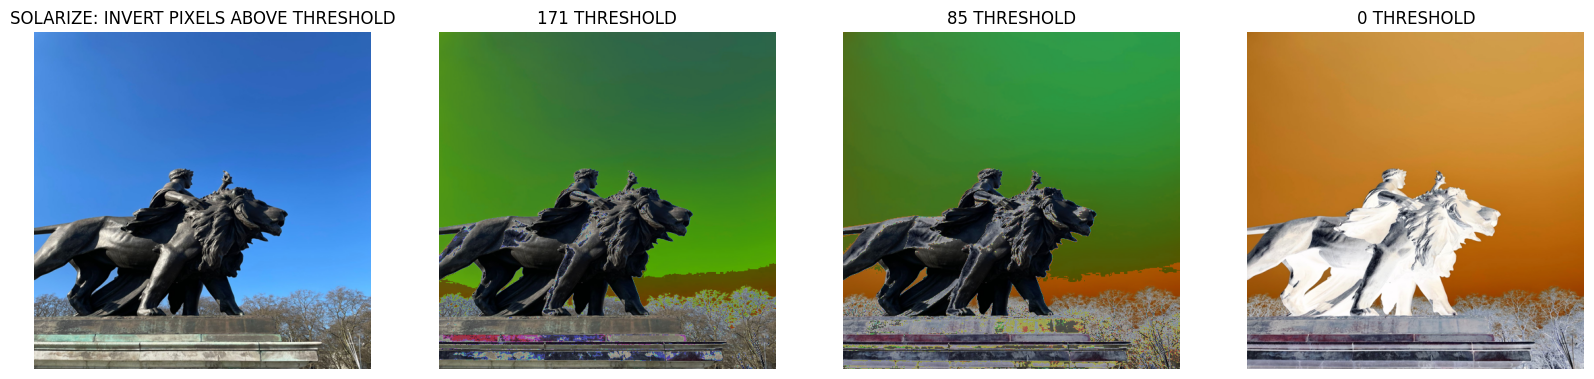

In [89]:
# Invertir todos los valores de píxeles por encima de un umbral
enhance_key = "solarize"
muestra3(
    images=[ImageOps.solarize(img, ranges[enhance_key][3]), 
            ImageOps.solarize(img, ranges[enhance_key][6]), 
            ImageOps.solarize(img, ranges[enhance_key][9])],
    titles=["SOLARIZE: INVERT PIXELS ABOVE THRESHOLD", 
            "{:.0f} THRESHOLD".format(ranges[enhance_key][3]), 
            "{:.0f} THRESHOLD".format(ranges[enhance_key][6]), 
            "{:.0f} THRESHOLD".format(ranges[enhance_key][9])])

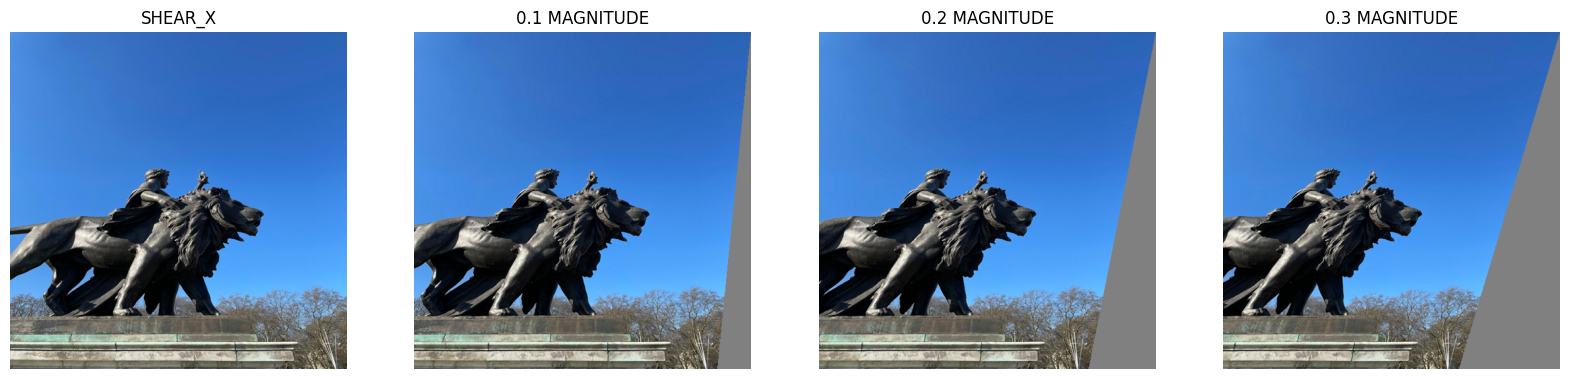

In [90]:
def shear_x(img, magnitude):
    """
    Aplica una transformación de cizalladura en el eje horizontal a la imagen.

    Args:
        img (PIL.Image.Image): Imagen a transformar.
        magnitude (float): Magnitud de la cizalladura. Puede ser positiva o negativa.

    Returns:
        PIL.Image.Image: Imagen transformada con cizalladura aplicada.
    """
    return img.transform(
        img.size, Image.AFFINE, (1, magnitude * random.choice([-1, 1]), 0, 0, 1, 0),
        Image.BICUBIC, fillcolor=(128, 128, 128))

# shear the image along the horizontal axis
enhance_key = "shearX"
muestra3(
    images=[shear_x(img, ranges[enhance_key][3]),
            shear_x(img, ranges[enhance_key][6]),
            shear_x(img, ranges[enhance_key][9])],
    titles=["SHEAR_X", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][9])])

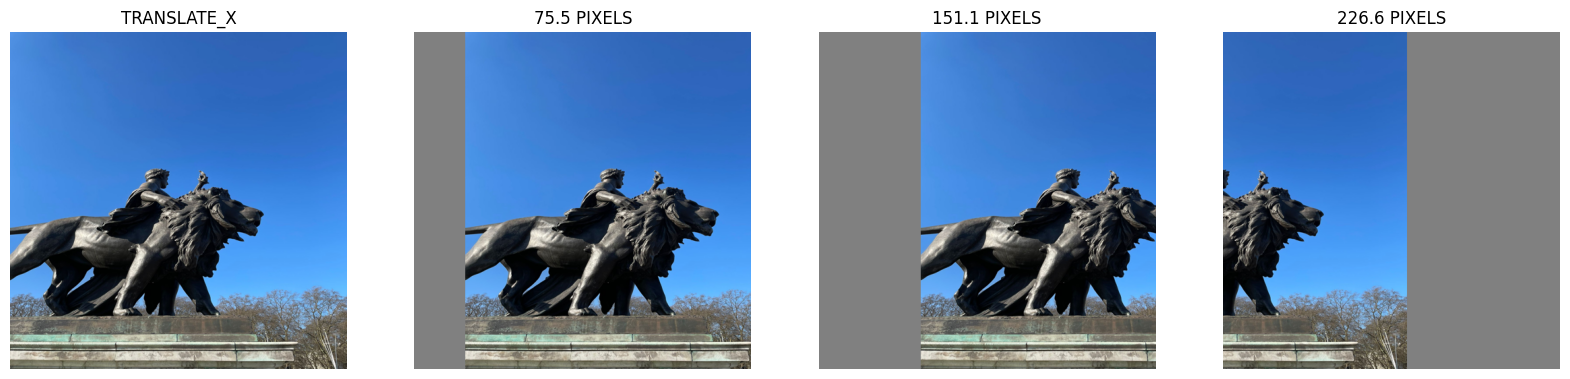

In [91]:
def translate_x(img, magnitude):
    return img.transform(
        img.size, Image.AFFINE, (1, 0, magnitude * img.size[0] * random.choice([-1, 1]), 0, 1, 0),
        fillcolor=(128, 128, 128))

enhance_key = "translateX"
muestra3(
    images=[translate_x(img, ranges[enhance_key][3]), 
            translate_x(img, ranges[enhance_key][6]), 
            translate_x(img, ranges[enhance_key][9])], 
    titles=["TRANSLATE_X", "{:.1f} PIXELS".format(ranges[enhance_key][3]*img.size[0]), 
            "{:.1f} PIXELS".format(ranges[enhance_key][6]*img.size[0]), 
            "{:.1f} PIXELS".format(ranges[enhance_key][9]*img.size[0])])

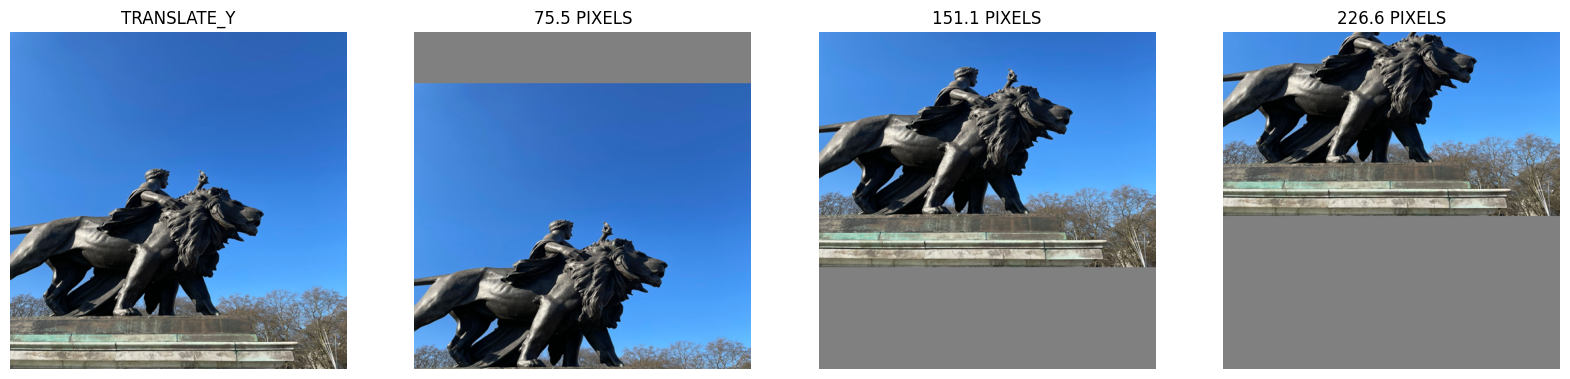

In [92]:
def translate_y(img, magnitude):
    return img.transform(
        img.size, Image.AFFINE, (1, 0, 0, 0, 1, magnitude * img.size[0] * random.choice([-1, 1])),
        fillcolor=(128, 128, 128))

enhance_key = "translateY"
muestra3(
    images=[translate_y(img, ranges[enhance_key][3]), 
            translate_y(img, ranges[enhance_key][6]), 
            translate_y(img, ranges[enhance_key][9])],  
    titles=["TRANSLATE_Y", "{:.1f} PIXELS".format(ranges[enhance_key][3]*img.size[1]), 
            "{:.1f} PIXELS".format(ranges[enhance_key][6]*img.size[1]), 
            "{:.1f} PIXELS".format(ranges[enhance_key][9]*img.size[1])])

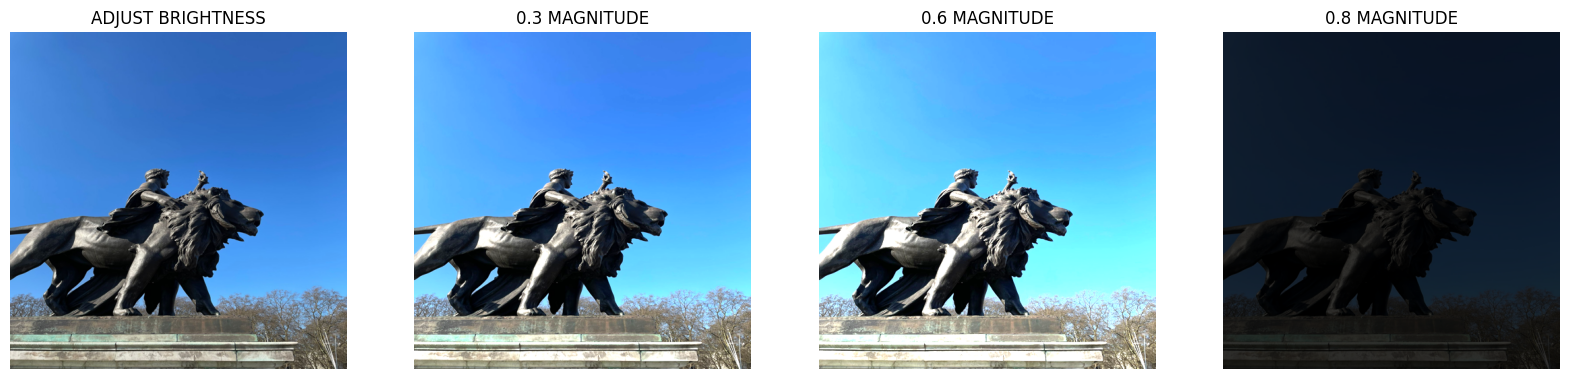

In [93]:
# Cambiar el brillo de la imagen
enhance_key = "brightness"
enhancer = ImageEnhance.Brightness(img)
muestra3(
    images=[enhancer.enhance(1 + ranges[enhance_key][3] * random.choice([-1, 1])),
            enhancer.enhance(1 + ranges[enhance_key][6] * random.choice([-1, 1])), 
            enhancer.enhance(1 + ranges[enhance_key][8] * random.choice([-1, 1]))],
    titles=["ADJUST BRIGHTNESS", "{:.1f} MAGNITUDE".format(ranges[enhance_key][3]),
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][6]), 
            "{:.1f} MAGNITUDE".format(ranges[enhance_key][8])])

## AutoAugment


In [1]:
from utils import *

c:\Users\nmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Datos  y desbalanceo 

In [2]:
# Cargar CIFAR-10
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


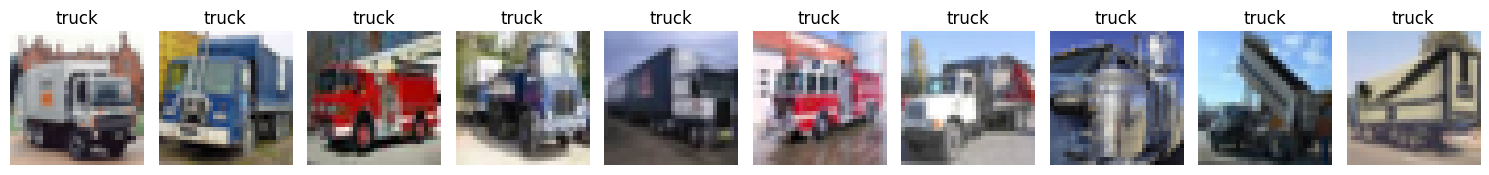

In [3]:
# Clase que deseas visualizar
target_class = 9 
muestra_por_clase(testset, target_class=target_class, num_images=10)


In [101]:
def visualizar_distribucion(dataset, title="Class Distribution"):
    """
    Visualiza la distribución de clases en un dataset.

    Args:
        dataset (torch.utils.data.Dataset): Dataset de PyTorch con imágenes y etiquetas.
        title (str): Título del gráfico. Por defecto, "Class Distribution".

    Returns:
        None: Muestra un gráfico de barras con la distribución de clases.
    """
    class_counts = defaultdict(int)
    for _, label in dataset:
        class_counts[label] += 1
    plt.bar(class_counts.keys(), class_counts.values(), tick_label=trainset.classes)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

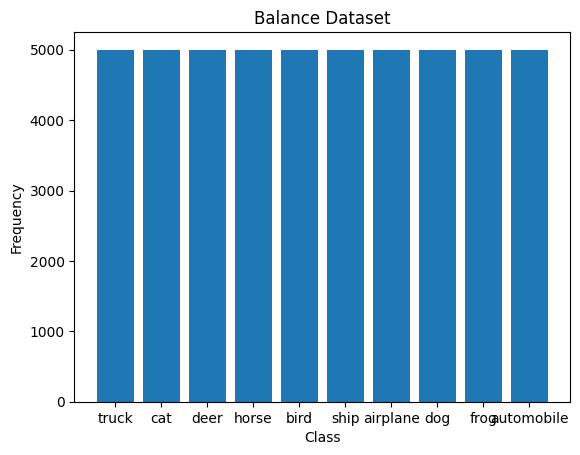

In [102]:
visualizar_distribucion(trainset, title="Balance Dataset")

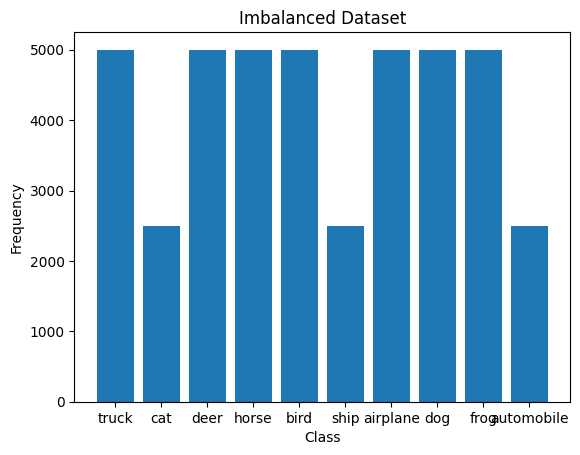

In [106]:
target_classes = [1, 5, 9]

# Crear el dataset desbalanceado
imbalanced_trainset = Desbalanceo(trainset, target_classes=target_classes, reduction_factor=0.5)
visualizar_distribucion(imbalanced_trainset, title="Imbalanced Dataset")


In [ ]:
imbalanced_trainloader = torch.utils.data.DataLoader(imbalanced_trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#### Entrenar un modelo desbalanceado de clasificacion de imagenes

In [17]:
# Entrenar y evaluar con el dataset desbalanceado
model = resnet_model()
train_model(model, imbalanced_trainloader, epochs=1)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
evaluate_model(model, testloader)

c:\Users\nmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\nmari\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/1], Loss: 1.0028
Accuracy: 70.81%


70.81

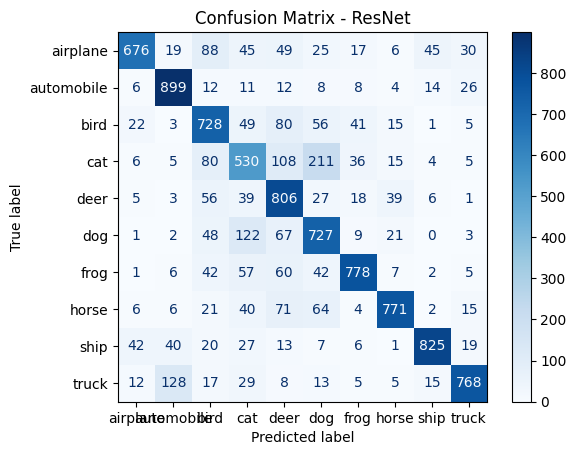

In [ ]:
# Obtener etiquetas y predicciones
y_true, y_pred = get_predictions(model, testloader)
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
class_names = testset.classes
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ResNet")
plt.show()


#### Hacer el aumento de datos con CIFRAR10Policy y BestParametros

In [ ]:
transform_with_autoaugment = transforms.Compose([
    CIFAR10Policy(),  # AutoAugment se aplica a imágenes en formato Pillow
    transforms.ToTensor(),  # Convertir a tensor después
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))  # Normalizar
])

In [ ]:
# Balancear el dataset
balanced_trainset = create_balanced_dataset(
    imbalanced_trainset,
    target_classes=[1, 5, 9],
    num_augments=2000,
    transform=transform_with_autoaugment
)

# Crear DataLoader para el dataset balanceado
balanced_trainloader = torch.utils.data.DataLoader(balanced_trainset, batch_size=64, shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


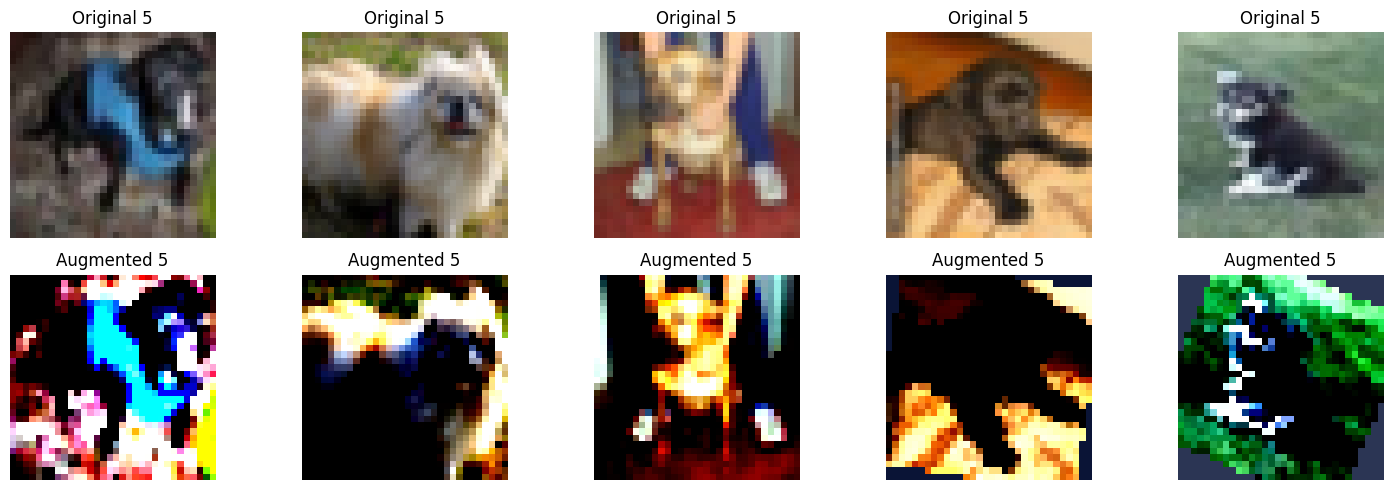

In [ ]:
# Visualizar transformaciones en una clase específica 
visualize_augmentations(imbalanced_trainset, transform_with_autoaugment, target_class=5)


In [ ]:
from autoaugment import SubPolicy

# Definir el objetivo para Optuna
def objective(trial):
    # Sugerir parámetros para las transformaciones
    p1 = trial.suggest_float("p1", 0.1, 1.0)
    p2 = trial.suggest_float("p2", 0.1, 1.0)
    mag1 = trial.suggest_int("mag1", 0, 9)
    mag2 = trial.suggest_int("mag2", 0, 9)
    op1 = trial.suggest_categorical("op1", ["rotate", "color", "contrast", "solarize", "sharpness"])
    op2 = trial.suggest_categorical("op2", ["rotate", "color", "contrast", "solarize", "sharpness"])

    # Crear una política basada en los parámetros
    policy = SubPolicy(p1, op1, mag1, p2, op2, mag2)
    transform_with_optuna = transforms.Compose([
        policy,
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Cargar datos augmentados
    trainset_augmented = torchvision.datasets.CIFAR10(
        root="./data", train=True, download=True, transform=transform_with_optuna
    )
    trainloader_augmented = torch.utils.data.DataLoader(trainset_augmented, batch_size=64, shuffle=True)

    # Entrenar el modelo
    model = resnet_model()
    train_model(model, trainloader_augmented, epochs=1)

    # Evaluar el modelo
    accuracy = evaluate_model(model, testloader)
    return accuracy


In [ ]:
# Crear el estudio de Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)  

# Mostrar los mejores parámetros
print("Best parameters:", study.best_params)

[I 2024-11-26 18:53:08,930] A new study created in memory with name: no-name-4ba83c03-c5af-4080-8c47-8431120b5187


Files already downloaded and verified
Epoch [1/1], Loss: 1.2619


[I 2024-11-26 19:04:24,847] Trial 0 finished with value: 45.16 and parameters: {'p1': 0.7696753475251946, 'p2': 0.7509594745960181, 'mag1': 8, 'mag2': 8, 'op1': 'solarize', 'op2': 'solarize'}. Best is trial 0 with value: 45.16.


Accuracy: 45.16%
Files already downloaded and verified
Epoch [1/1], Loss: 1.0601


[I 2024-11-26 19:15:30,648] Trial 1 finished with value: 34.72 and parameters: {'p1': 0.38988222083017754, 'p2': 0.22953813907557927, 'mag1': 1, 'mag2': 7, 'op1': 'contrast', 'op2': 'rotate'}. Best is trial 0 with value: 45.16.


Accuracy: 34.72%
Files already downloaded and verified
Epoch [1/1], Loss: 1.1633


[I 2024-11-26 19:26:33,709] Trial 2 finished with value: 67.62 and parameters: {'p1': 0.7322190608163154, 'p2': 0.3705450284025562, 'mag1': 0, 'mag2': 9, 'op1': 'contrast', 'op2': 'contrast'}. Best is trial 2 with value: 67.62.


Accuracy: 67.62%
Files already downloaded and verified
Epoch [1/1], Loss: 1.1148


[I 2024-11-26 19:37:30,919] Trial 3 finished with value: 63.75 and parameters: {'p1': 0.1394476988191095, 'p2': 0.2696771362163827, 'mag1': 1, 'mag2': 9, 'op1': 'sharpness', 'op2': 'contrast'}. Best is trial 2 with value: 67.62.


Accuracy: 63.75%
Files already downloaded and verified
Epoch [1/1], Loss: 1.2373


[I 2024-11-26 19:48:33,379] Trial 4 finished with value: 46.29 and parameters: {'p1': 0.7299435752746176, 'p2': 0.15706255504543476, 'mag1': 9, 'mag2': 8, 'op1': 'rotate', 'op2': 'sharpness'}. Best is trial 2 with value: 67.62.


Accuracy: 46.29%
Files already downloaded and verified
Epoch [1/1], Loss: 1.1708


[I 2024-11-26 19:59:31,679] Trial 5 finished with value: 47.1 and parameters: {'p1': 0.4352300829814001, 'p2': 0.8151867951148173, 'mag1': 9, 'mag2': 1, 'op1': 'rotate', 'op2': 'color'}. Best is trial 2 with value: 67.62.


Accuracy: 47.10%
Files already downloaded and verified
Epoch [1/1], Loss: 1.2340


[I 2024-11-26 20:10:37,217] Trial 6 finished with value: 39.42 and parameters: {'p1': 0.3267816281546162, 'p2': 0.6641249091988148, 'mag1': 7, 'mag2': 1, 'op1': 'solarize', 'op2': 'solarize'}. Best is trial 2 with value: 67.62.


Accuracy: 39.42%
Files already downloaded and verified
Epoch [1/1], Loss: 1.2037


[I 2024-11-26 20:21:58,690] Trial 7 finished with value: 48.31 and parameters: {'p1': 0.5145233870124122, 'p2': 0.6219613897210906, 'mag1': 1, 'mag2': 6, 'op1': 'sharpness', 'op2': 'solarize'}. Best is trial 2 with value: 67.62.


Accuracy: 48.31%
Files already downloaded and verified
Epoch [1/1], Loss: 1.2197


[I 2024-11-26 20:33:04,238] Trial 8 finished with value: 44.83 and parameters: {'p1': 0.7432743999298557, 'p2': 0.7539353224425018, 'mag1': 4, 'mag2': 1, 'op1': 'rotate', 'op2': 'solarize'}. Best is trial 2 with value: 67.62.


Accuracy: 44.83%
Files already downloaded and verified
Epoch [1/1], Loss: 1.1279


[I 2024-11-26 20:44:08,064] Trial 9 finished with value: 40.28 and parameters: {'p1': 0.2623137855901703, 'p2': 0.9058339321541181, 'mag1': 7, 'mag2': 1, 'op1': 'solarize', 'op2': 'contrast'}. Best is trial 2 with value: 67.62.


Accuracy: 40.28%
Best parameters: {'p1': 0.7322190608163154, 'p2': 0.3705450284025562, 'mag1': 0, 'mag2': 9, 'op1': 'contrast', 'op2': 'contrast'}


In [22]:
best_policy = SubPolicy(
    study.best_params["p1"], "rotate", study.best_params["mag1"],
    study.best_params["p2"], "color", study.best_params["mag2"]
)
transform_with_best_policy = Compose([
    best_policy,
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [ ]:
def visualize_augmentations(dataset, transform, target_class, num_samples=5):
    original_images = [img for img, label in dataset if label == target_class][:num_samples]
    
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(original_images):
        # Asegurar que la imagen esté en formato Pillow antes de transformarla
        if isinstance(img, torch.Tensor):
            img = to_pil_image(img)

        # Mostrar imagen original
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(np.asarray(img))
        plt.title(f"Original {target_class}")
        plt.axis('off')
        
        # Mostrar imagen aumentada
        augmented_img = transform(img)  # AutoAugment aplicado
        if isinstance(augmented_img, torch.Tensor):
            augmented_img = augmented_img.permute(1, 2, 0)  # Convertir tensor a (H, W, C)
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(np.asarray(augmented_img))
        plt.title(f"Augmented {target_class}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

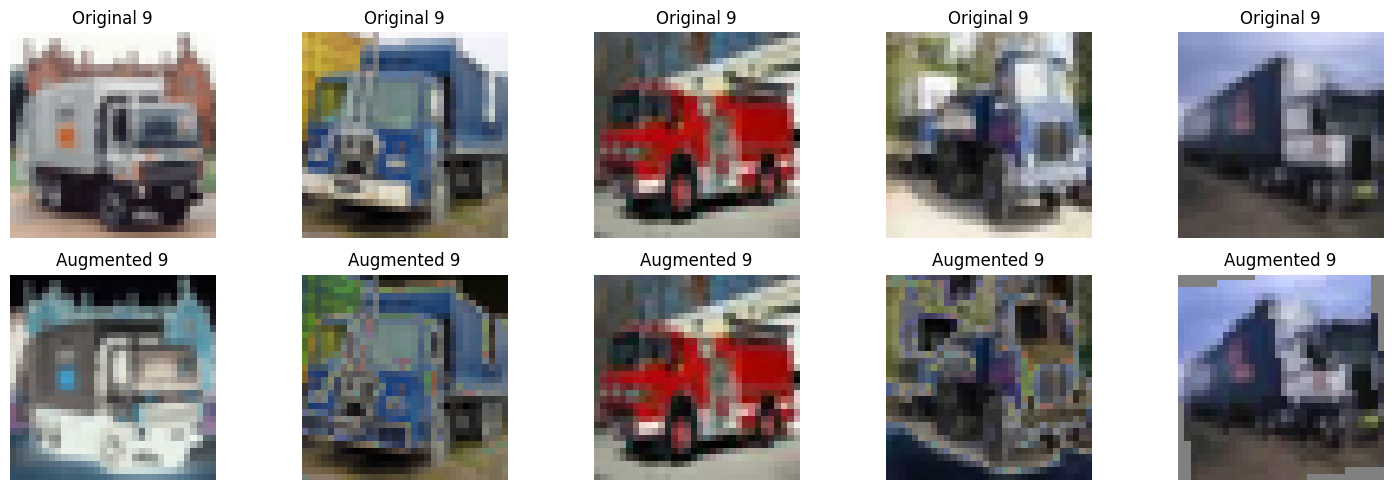

In [ ]:
# Usar las nuevas políticas con transformaciones
transform_with_autoaugment = transforms.Compose([
    CIFAR10Policy(), 
    transforms.ToTensor(), 
])

# Visualizar transformaciones en imágenes de prueba
visualize_augmentations(testset, transform_with_autoaugment, target_class=9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


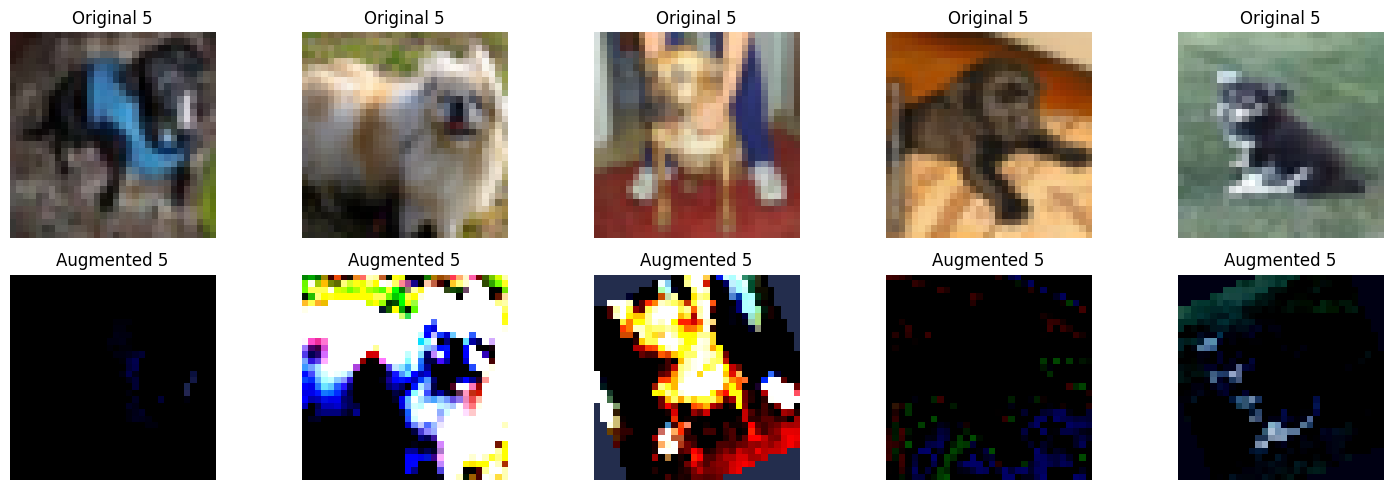

In [ ]:
# Visualizar transformaciones en una clase específica 
visualize_augmentations(imbalanced_trainset, transform_with_autoaugment, target_class=5)


#### Balancear Dataset y entrenar modelo

In [147]:
# Balancear el dataset
balanced_trainset = create_balanced_dataset(
    imbalanced_trainset,
    target_classes=target_classes,
    num_augments=5,
    transform=transform_with_best_policy
)

# Crear DataLoader para el dataset balanceado
balanced_trainloader = torch.utils.data.DataLoader(balanced_trainset, batch_size=64, shuffle=True)


In [ ]:
# Entrenar y evaluar con el dataset balanceado
model = resnet_model()
train_model(model, balanced_trainloader, epochs=10)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
evaluate_model(model, testloader)

Epoch [1/10], Loss: 0.9999
Epoch [2/10], Loss: 0.6962
Epoch [3/10], Loss: 0.5921
Epoch [4/10], Loss: 0.4448
Epoch [5/10], Loss: 0.3766
Epoch [6/10], Loss: 0.3501
Epoch [7/10], Loss: 0.2624
Epoch [8/10], Loss: 0.2316
Epoch [9/10], Loss: 0.1504
Epoch [10/10], Loss: 0.1556
Accuracy: 79.01%


79.01

In [ ]:
# Entrenar y evaluar con el dataset desbalanceado
model = resnet_model()
train_model(model, balanced_trainloader, epochs=15)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
evaluate_model(model, testloader)

Epoch [1/10], Loss: 0.9999
Epoch [2/10], Loss: 0.6962
Epoch [3/10], Loss: 0.5921
Epoch [4/10], Loss: 0.4448
Epoch [5/10], Loss: 0.3766
Epoch [6/10], Loss: 0.3501
Epoch [7/10], Loss: 0.2624
Epoch [8/10], Loss: 0.2316
Epoch [9/10], Loss: 0.1504
Epoch [10/10], Loss: 0.1556
Accuracy: 79.01%


79.01

In [ ]:
# Entrenar y evaluar con el dataset desbalanceado
model = resnet_model()
train_model(model, trainloader, epochs=50)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
evaluate_model(model, testloader)

Epoch [1/50], Loss: 0.9710
Epoch [2/50], Loss: 0.6612
Epoch [3/50], Loss: 0.5374
Epoch [4/50], Loss: 0.4428
Epoch [5/50], Loss: 0.3452
Epoch [6/50], Loss: 0.2698
Epoch [7/50], Loss: 0.2166
Epoch [8/50], Loss: 0.1992
Epoch [9/50], Loss: 0.1612
Epoch [10/50], Loss: 0.1278
Epoch [11/50], Loss: 0.1048
Epoch [12/50], Loss: 0.1042
Epoch [13/50], Loss: 0.0905
Epoch [14/50], Loss: 0.0860
Epoch [15/50], Loss: 0.0790
Epoch [16/50], Loss: 0.0707
Epoch [17/50], Loss: 0.0859
Epoch [18/50], Loss: 0.0507
Epoch [19/50], Loss: 0.0708
Epoch [20/50], Loss: 0.0666
Epoch [21/50], Loss: 0.0481
Epoch [22/50], Loss: 0.0504
Epoch [23/50], Loss: 0.0453
Epoch [24/50], Loss: 0.0475


KeyboardInterrupt: 

In [ ]:
evaluate_model(model, testloader)

Accuracy: 79.72%


79.72

: 